<a href="https://colab.research.google.com/github/mayankraj25/SciKit-Learn/blob/main/Customer_Classification(K_Mean_Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# The original error was because file_path was an empty string.
# We need to specify the actual file name within the dataset.
file_path = "Mall_Customers.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

<ipython-input-3-80b60cc629f6>:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
print(df.shape)
df.info()
df.isnull().sum()

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [16]:
X=df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

WCSS(Within Cluster Sum of Squares)
*   WCSS is a metric used to evaluate how well the data points are clustered in K-Means clustering.
*   WCSS is the sum of the squared distances between each point and the centroid of its assigned cluster.
⸻

🧠 Intuition:
*	Lower WCSS means data points are closer to their cluster centroids → better clustering.
*	As the number of clusters k increases, WCSS always decreases because each cluster has fewer points, and centroids are closer to the points.

In [22]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)
    #.inertia_ is used to get the wcss value
print(wcss)

[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905]


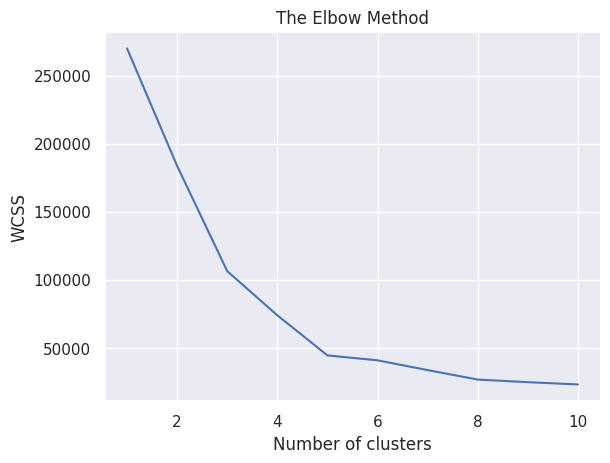

In [24]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

This shows that the number of clusters is 5 (Elbow Method)

In [26]:
model=KMeans(n_clusters=5,random_state=42)
y=model.fit_predict(X)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


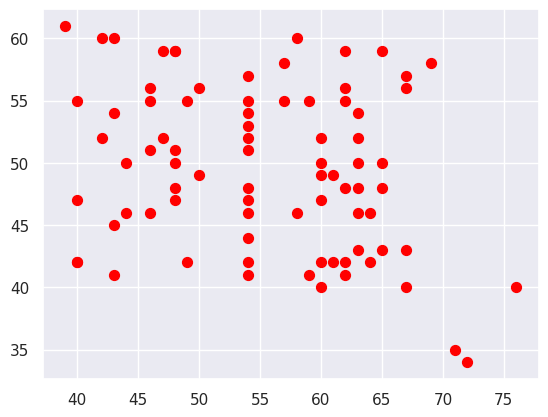